# **PROJET MACHINE LEARNING M1 2024/2025 DATASET ACCIDENTS**

### **Nom : Mohammedi - Viallard**
### **Prénom : Kenza - Thibault**

# Exploration du dataset

In [226]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [297]:
pd.set_option('display.max_columns', None)

In [298]:
dataset = pd.read_csv('train_data_accidents.csv')
dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198448 entries, 0 to 198447
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   place    198448 non-null  int64  
 1   catu     198448 non-null  int64  
 2   sexe     198448 non-null  int64  
 3   trajet   198448 non-null  int64  
 4   secu1    198448 non-null  int64  
 5   secu2    198448 non-null  int64  
 6   secu3    198448 non-null  int64  
 7   locp     198448 non-null  int64  
 8   catv     198448 non-null  int64  
 9   an_nais  193851 non-null  float64
 10  mois     198448 non-null  int64  
 11  occutc   1665 non-null    float64
 12  obs      198448 non-null  int64  
 13  obsm     198448 non-null  int64  
 14  choc     198448 non-null  int64  
 15  manv     198448 non-null  int64  
 16  lum      198448 non-null  int64  
 17  agg      198448 non-null  int64  
 18  int      198448 non-null  int64  
 19  atm      198448 non-null  int64  
 20  col      198448 non-null  

In [299]:
dataset.shape

(198448, 34)

In [300]:
display(dataset)

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,mois,occutc,obs,obsm,choc,manv,lum,agg,int,atm,col,catr,circ,vosp,prof,plan,surf,infra,situ,lat,long,hrmn,jour,grav
0,1,1,1,5,2,-1,-1,0,34,1970.0,9,NaN,0,2,1,1,1,2,2,1,3,3,2,0,1,1,1,0,1,50.391191,1.605050,16:35,25,3
1,2,2,2,5,1,8,-1,0,10,2001.0,6,NaN,0,2,2,1,1,2,1,1,3,4,3,1,1,1,1,0,1,43.425772,3.731132,17:20,1,1
2,1,1,1,0,2,-1,-1,0,7,1986.0,6,NaN,0,0,4,13,1,1,1,1,2,3,2,0,1,1,1,0,1,43.507931,3.720036,16:50,11,4
3,1,1,2,1,1,4,-1,-1,7,1989.0,1,NaN,0,2,4,0,3,1,1,2,4,1,3,0,1,1,2,0,1,48.911180,2.005489,18:00,29,4
4,1,1,1,9,8,0,-1,-1,7,2002.0,12,NaN,0,0,9,26,2,2,1,1,7,1,2,0,1,2,2,0,1,47.430710,-0.506032,17:35,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198443,1,1,2,5,8,8,-1,-1,50,1980.0,7,NaN,0,2,8,1,1,2,1,1,3,4,3,1,2,1,1,0,1,43.102753,5.811474,12:55,22,1
198444,2,2,1,0,1,0,-1,-1,10,1988.0,8,NaN,0,2,7,1,1,2,2,1,3,3,1,0,1,1,1,0,1,48.914542,2.229174,10:20,18,1
198445,1,1,1,0,1,0,-1,-1,7,1997.0,7,NaN,0,2,4,1,5,1,1,1,2,1,3,0,2,1,1,0,1,48.902870,2.358630,22:40,9,4
198446,1,1,2,5,1,0,-1,0,7,1979.0,6,NaN,0,2,1,13,1,1,1,1,1,3,2,0,1,1,1,0,1,44.510370,6.079600,16:25,18,3


In [301]:
unique_hrmn = dataset['hrmn'].nunique()
print(unique_hrmn)

1367


### Distribution de la gravité des accidents

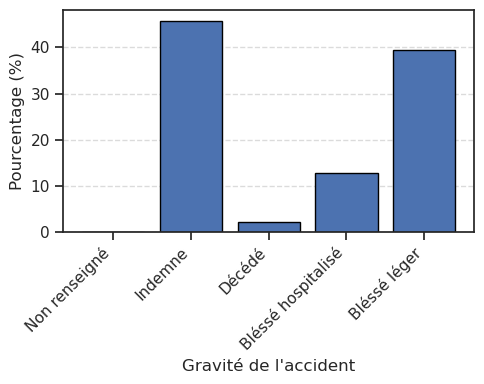

In [302]:
grav_distribution = dataset['grav'].value_counts(normalize=True) * 100

ordered_indices = [0, 1, 2, 3, 4]
ordered_labels = ['Non renseigné', 'Indemne', 'Décédé', 'Bléssé hospitalisé', 'Bléssé léger']

grav_distribution = grav_distribution.reindex(ordered_indices, fill_value=0)
plt.figure(figsize=(5, 4))
plt.bar(ordered_indices, grav_distribution.values, edgecolor='black')
plt.xticks(ordered_indices, ordered_labels, rotation=45, ha="right")

plt.xlabel("Gravité de l'accident")
plt.ylabel("Pourcentage (%)")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Observations:
* Une seule variable catégorielle à recoder, 'hrmn' -> heure et minute de l'accident
* Le dataset contient 198,448 observations et 34 features
* La variable hrmn (heure-minute de l’accident) présente 1367 valeurs uniques, ce qui montre une large dispersion des horaires d’accidents
* La distribution de la gravité des accidents montre que la majorité des incidents entraînent des blessures plutôt que des décès

In [303]:
dataset[(dataset["catu"] == 3) & (dataset["catr"] == 1)].sample(n=15)

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,mois,occutc,obs,obsm,choc,manv,lum,agg,int,atm,col,catr,circ,vosp,prof,plan,surf,infra,situ,lat,long,hrmn,jour,grav
113109,10,3,1,4,8,0,-1,1,7,1970.0,12,NaN,1,0,1,2,3,1,1,1,6,1,1,0,1,1,2,0,1,50.598160,3.142670,05:50,7,2
182418,10,3,2,3,0,-1,-1,1,7,2009.0,8,NaN,0,1,1,12,3,1,4,2,6,1,3,0,1,1,2,0,1,-22.164564,166.387703,18:00,9,2
170159,10,3,1,9,0,-1,-1,6,17,1985.0,9,NaN,0,1,1,2,3,1,1,1,6,1,3,0,1,1,1,0,1,50.618921,3.003172,03:00,14,2
152072,10,3,1,0,0,-1,-1,6,10,1958.0,8,NaN,1,1,1,2,1,1,1,1,6,1,1,0,1,1,1,0,2,49.360433,2.107755,14:17,19,2
3617,10,3,1,5,0,-1,-1,0,7,1998.0,9,NaN,0,0,6,21,2,1,1,1,6,1,2,0,1,1,1,0,1,48.396656,0.111344,20:00,12,3
27059,10,3,1,4,4,-1,-1,1,10,1988.0,3,NaN,0,9,8,1,1,1,1,1,6,1,1,0,1,2,1,0,1,46.185803,4.772165,09:15,18,3
173818,10,3,1,9,0,0,0,1,14,2001.0,7,NaN,0,1,1,2,3,1,1,1,6,1,3,0,1,1,1,0,1,50.598949,3.179386,01:15,9,2
41103,10,3,1,4,4,-1,-1,6,10,1974.0,11,NaN,0,1,2,0,3,1,1,1,6,1,3,0,1,1,1,8,2,-22.182557,166.431992,18:30,25,2
113230,10,3,1,5,0,0,0,6,7,2001.0,1,NaN,1,1,1,1,3,1,1,2,6,1,3,0,1,1,2,0,1,48.581940,2.637600,23:34,3,1
145304,10,3,1,5,0,-1,-1,6,7,1979.0,8,NaN,0,1,2,14,1,1,1,1,6,1,3,0,1,1,1,0,2,45.677821,4.958100,15:07,14,2


Au premier abord, les viles semblent être le théatre de beaucoup d'accident sans blessur, on remarque une grosse densité de point vert dans la périphérie des plus grande ville de france (Paris, Lyon, Marseille, Lille, Toulouse..) les points hors de ces agglomérations sont souvent des accidents a la gravité plus importante, et suivent en majorité les grands axes autoroutiers reliant ces métropoles.


### Analyse de la Répartition Géographique des Accidents




In [304]:
palette = {
        -1: "#FFFFFF",
         1: "#4daf4a",
         2: "#e41a1c",
         3: "#ff7f00",
         4: "#377eb8"
}

(<Figure size 1800x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'Localisation des accidents en France'}, xlabel='Longitude', ylabel='Latitude'>)

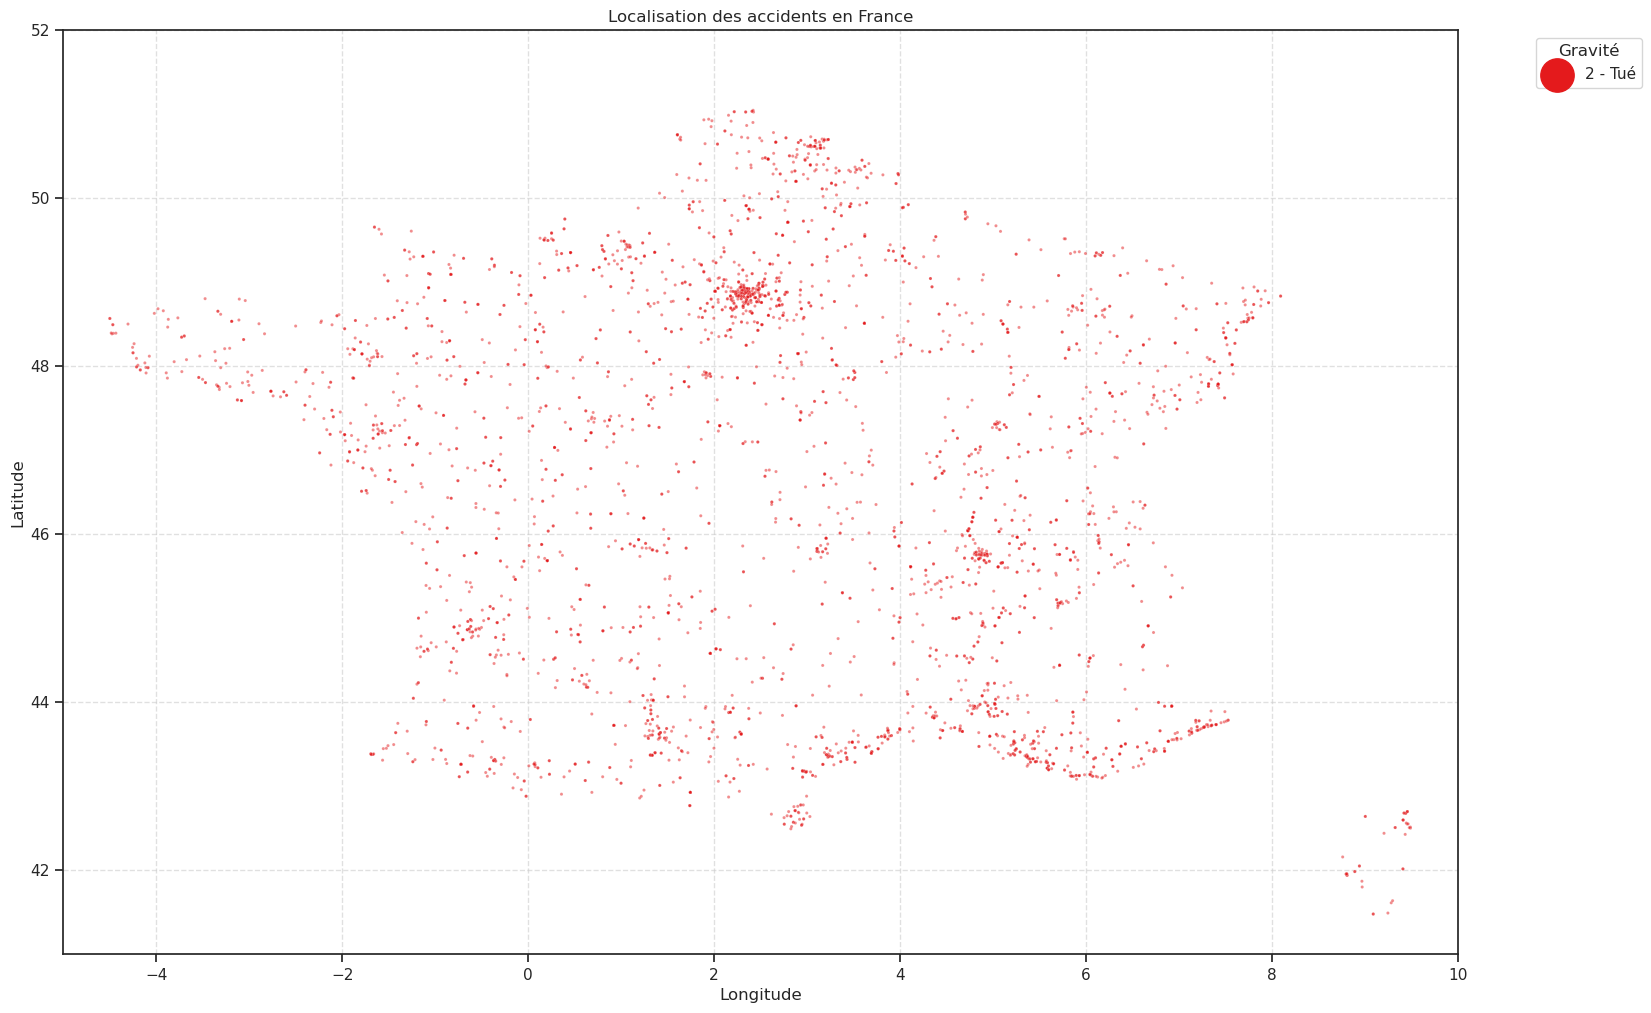

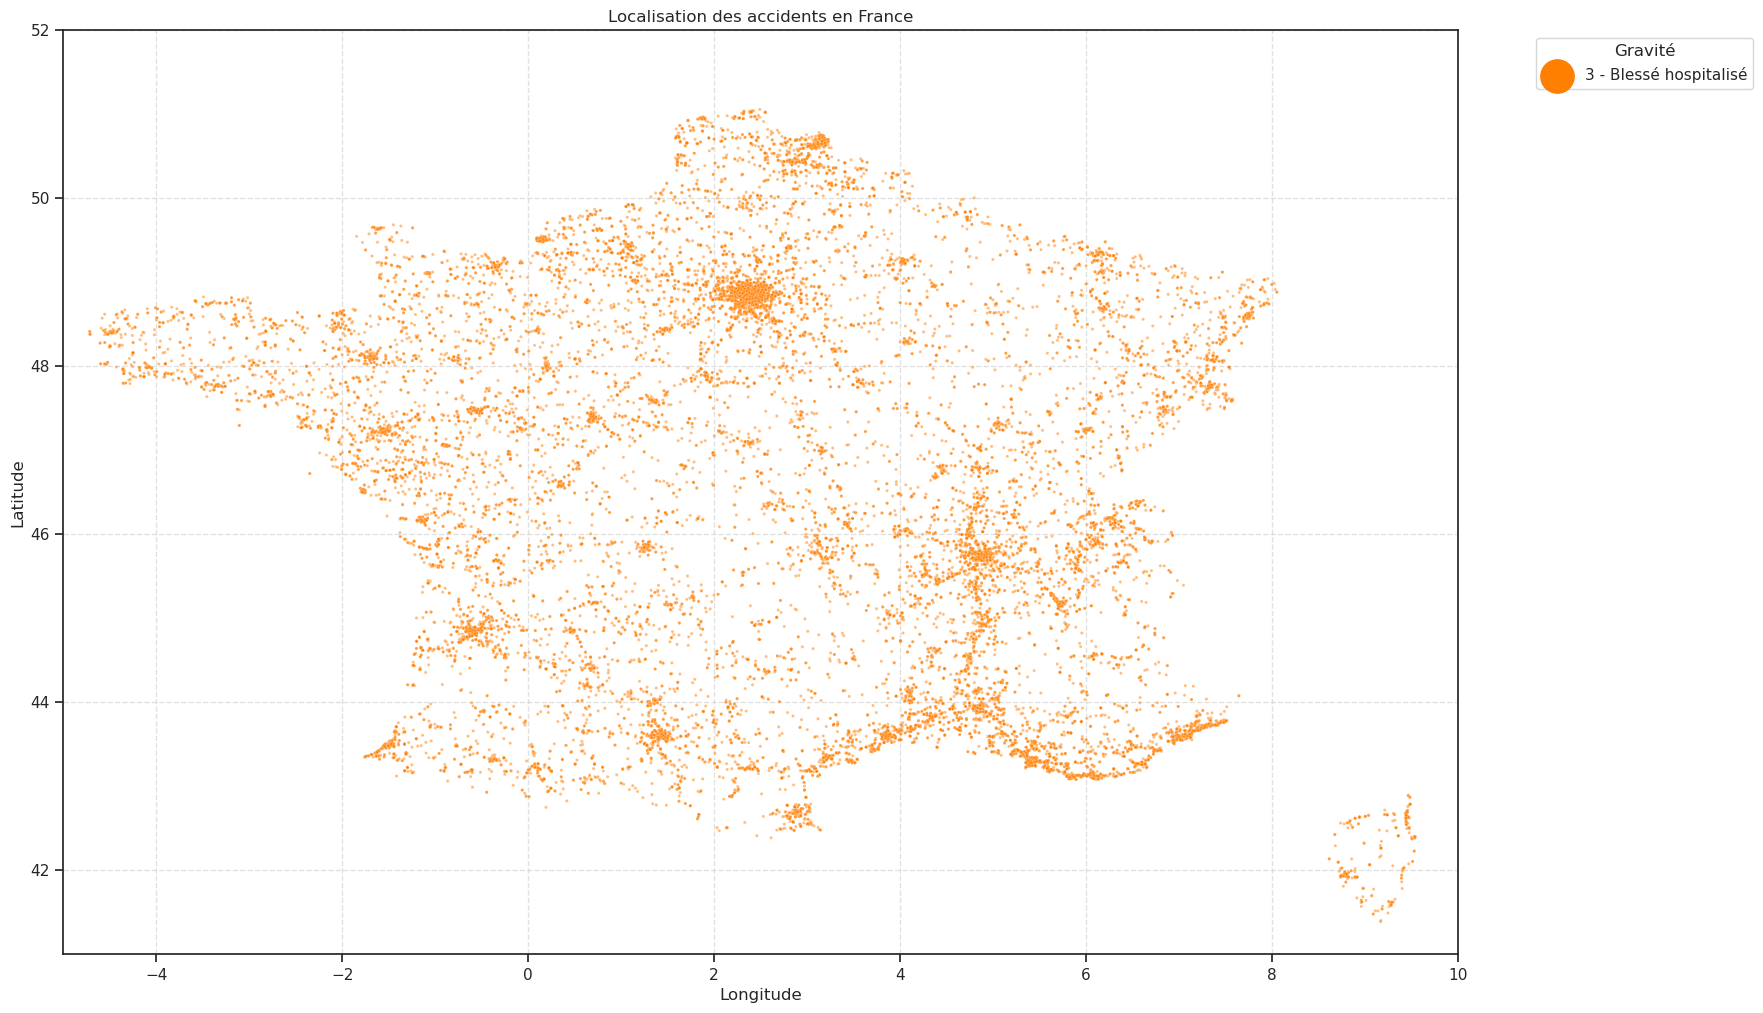

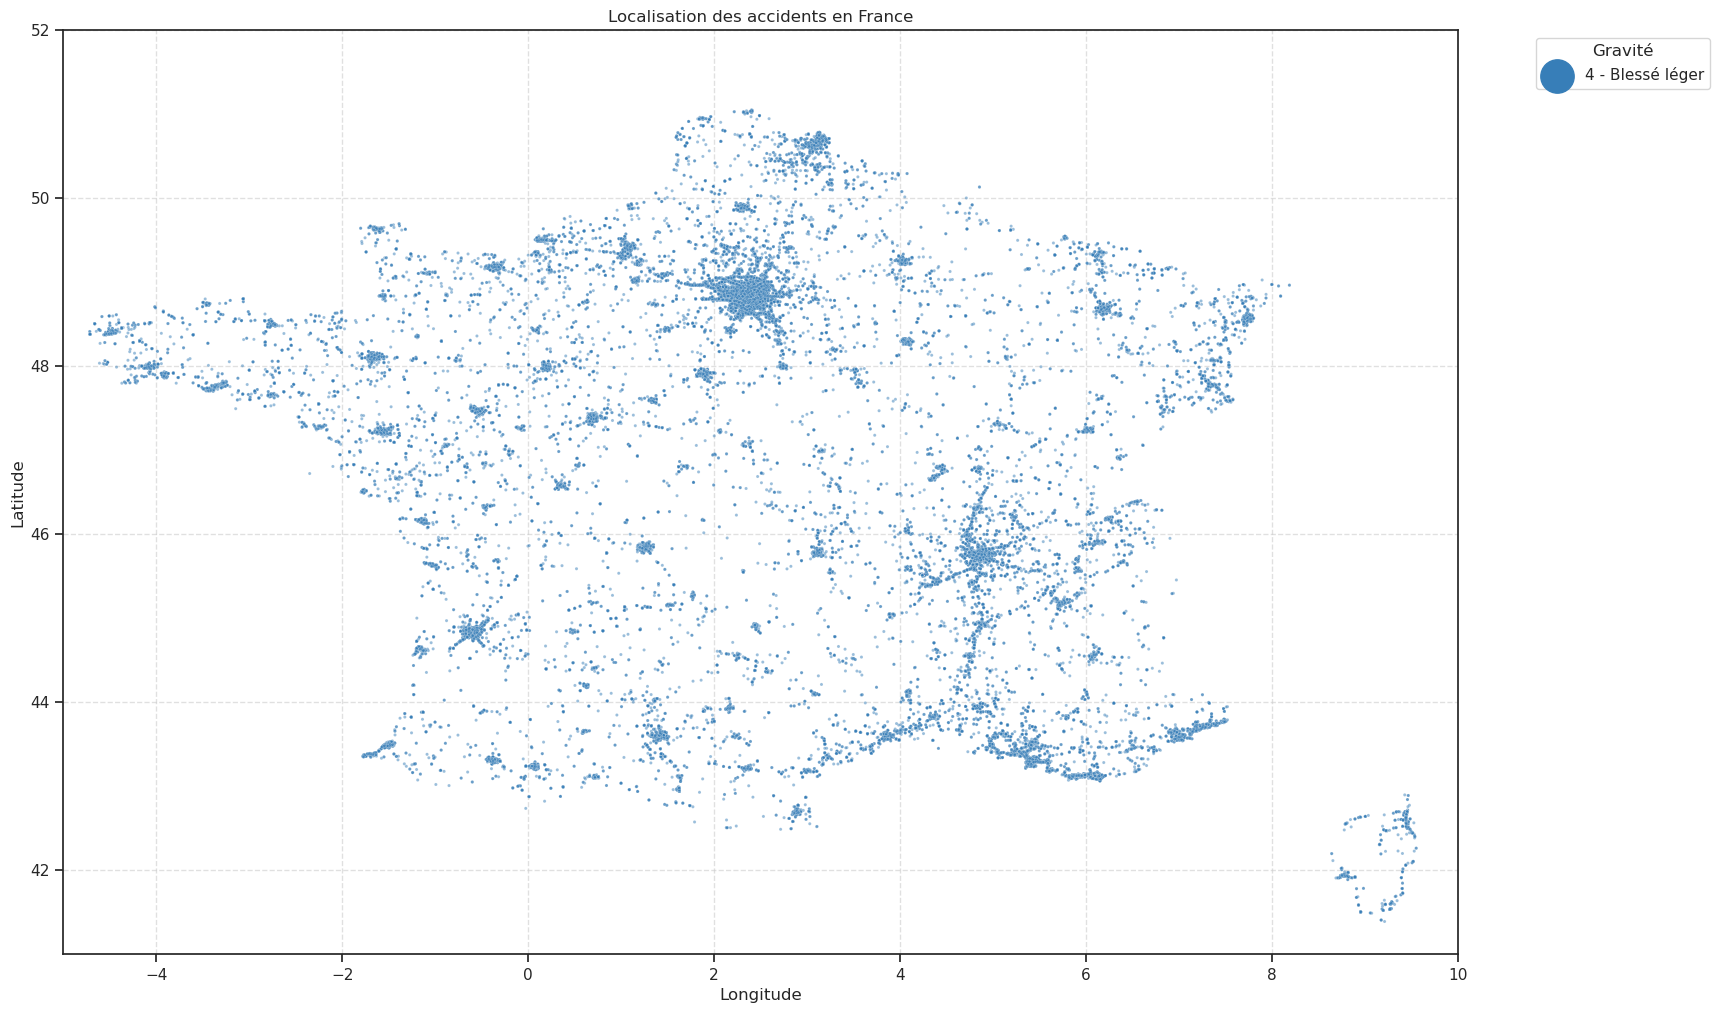

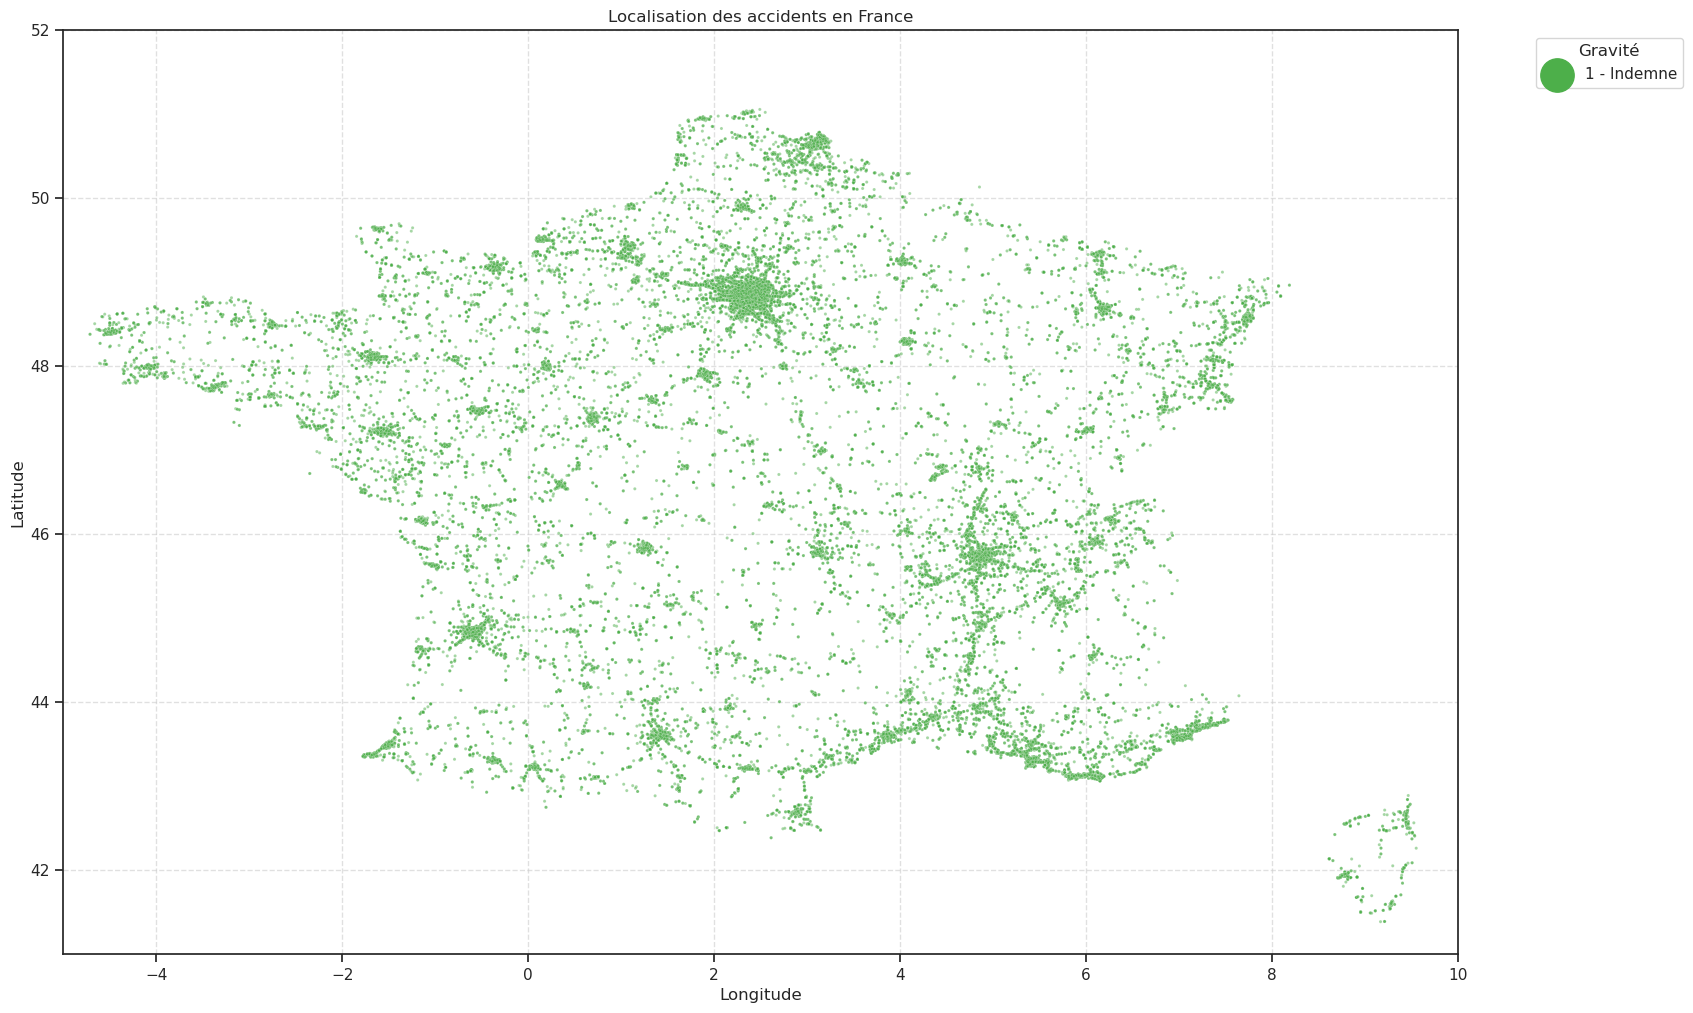

In [305]:
def plot_accidents_by_grav(dataset, grav_value, palette):
    title = "Localisation des accidents en France"
    alpha = 0.5
    figsize = (18, 12)
    point_size = 5
    hue = "grav"
    palette

    fig, ax = plt.subplots(figsize=figsize)
    data = dataset[dataset["grav"] == grav_value]

    sns.scatterplot(
        data=data,  
        x='long',
        y='lat',
        hue=hue,
        style=None,
        alpha=alpha,
        s=point_size,
        palette=palette,
        ax=ax
    )

    ax.set(title=title, xlabel='Longitude', ylabel='Latitude')
    ax.set_xlim(-5, 10)
    ax.set_ylim(41, 52)
    ax.grid(True, linestyle='--', alpha=0.6)

    gravity_descriptions = {
        -1: "Non renseigné",
         1: "Indemne",
         2: "Tué",
         3: "Blessé hospitalisé",
         4: "Blessé léger"
    }
    
    handles, labels = ax.get_legend_handles_labels()
    new_labels = []
    for label in labels:
        code = int(label)
        if code in gravity_descriptions:
            new_labels.append(f"{code} - {gravity_descriptions[code]}")
        else:
            new_labels.append(label)
    ax.legend(handles, new_labels, title="Gravité", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=4.0)
    
    return fig, ax

plot_accidents_by_grav(dataset, 2, palette)
plot_accidents_by_grav(dataset, 3, palette)
plot_accidents_by_grav(dataset, 4, palette)
plot_accidents_by_grav(dataset, 1, palette)


On remarque une concetration d'accident léger et bénin dans les agglomérations

### Zoom sur les métropoles françaises

Cette section illustre comment « zoomer » sur plusieurs grandes métropoles (Paris, Lyon, Marseille, Lille, Toulouse, etc.) pour afficher uniquement les accidents situés dans ces zones urbaines, en mettant en évidence la **gravité** de chaque accident.

---

### 1. bornes géographiques

Nous allons définir pour chaque ville un rectangle géographique (bounding box) à l’aide de valeurs minimales et maximales de **latitude** et de **longitude**.
* Paris (IDF) : lat entre 48.5 et 49.1, long entre 1.9 et 2.9
* Lyon : lat entre 45.5 et 45.9, long entre 4.6 et 5.2
* Marseille : lat entre 43.1 et 43.5, long entre 5.1 et 5.6
* Toulouse : lat entre 43.4 et 43.75, long entre 1.2 et 1.7
* Lille : lat entre 50.5 et 51.0, long entre 2.9 et 3.3


Ces plages délimitent la zone que l’on souhaite visualiser. Vous pouvez affiner ces bornes selon vos besoins ou agrandir/rétrécir pour zoomer plus ou moins.


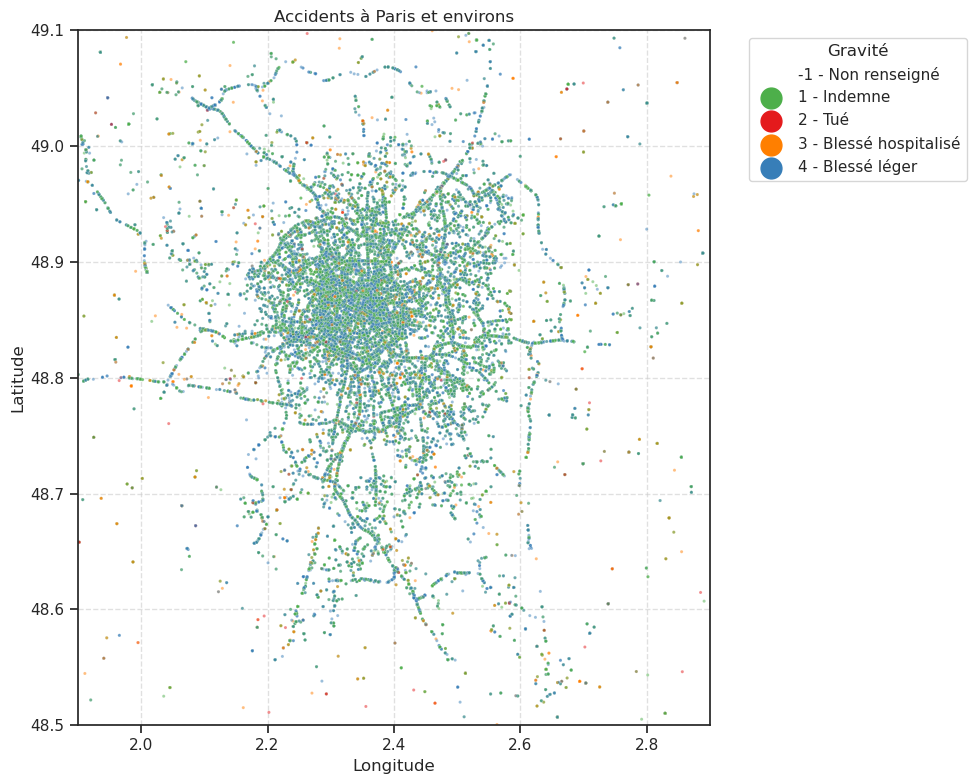

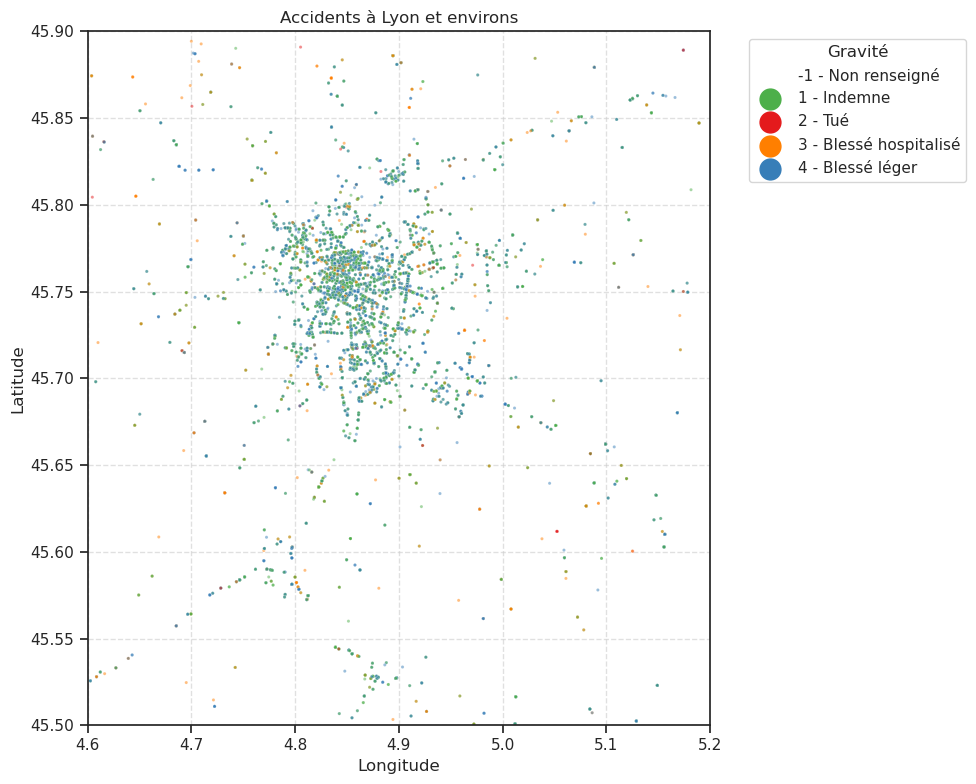

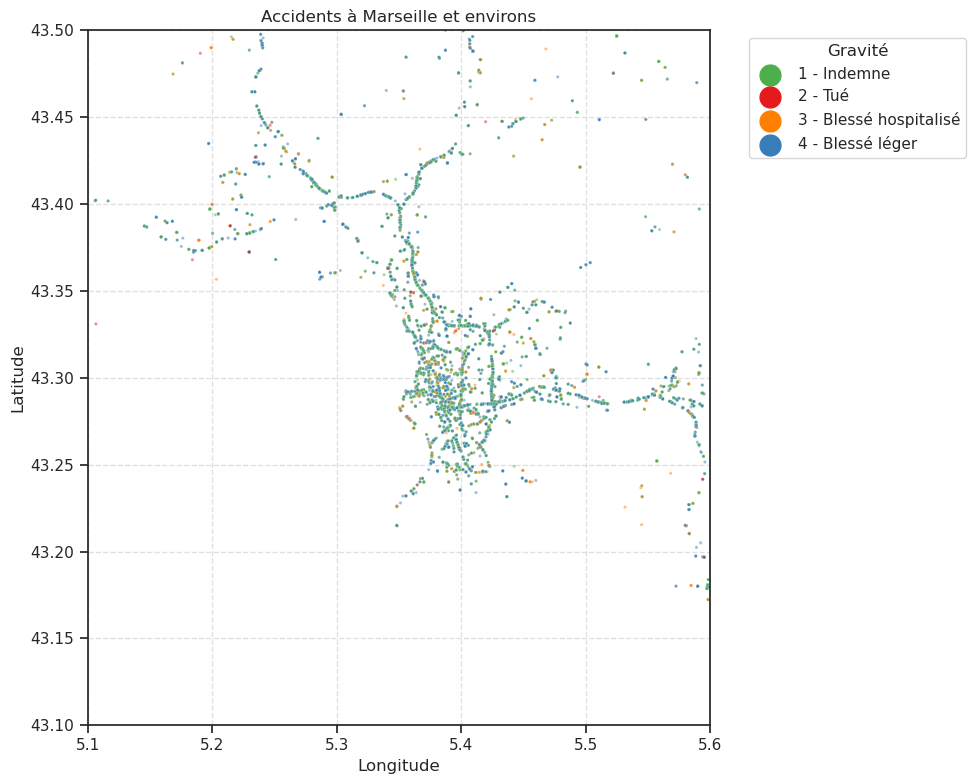

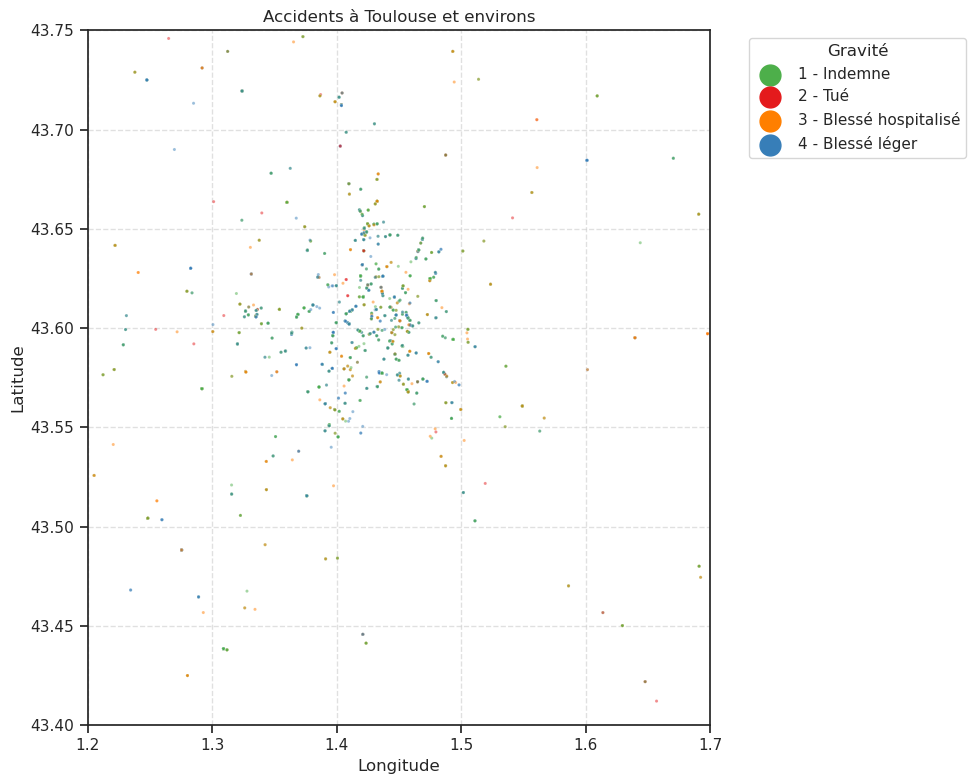

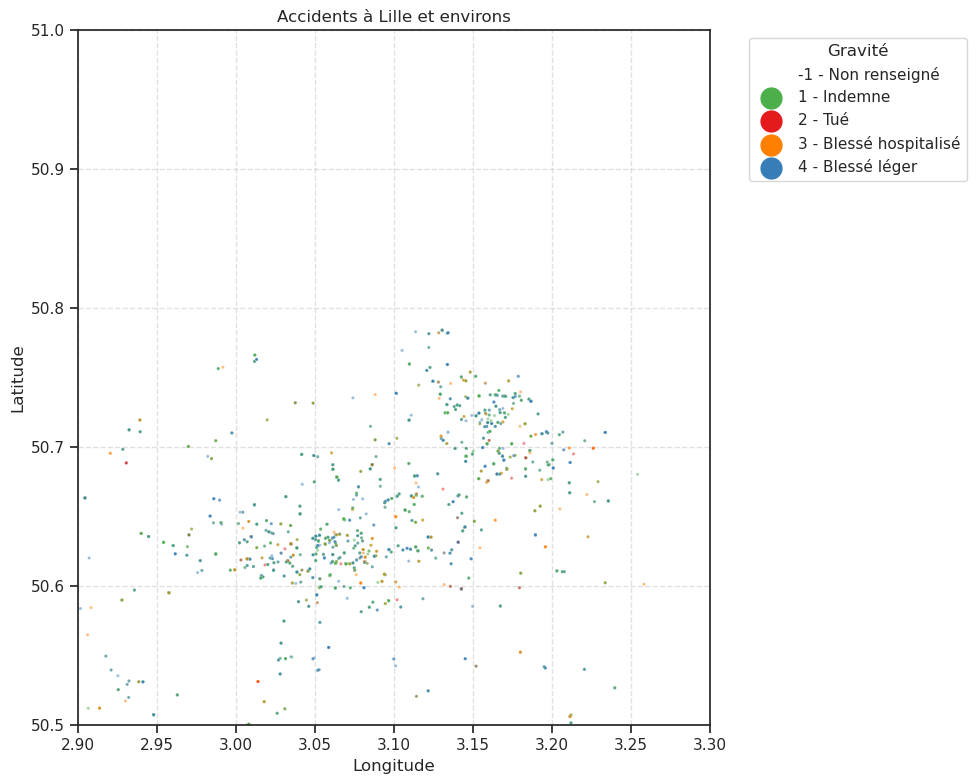

In [306]:
def plot_city_accidents(dataset, city_name, 
                        lat_min, lat_max, long_min, long_max, 
                        palette, alpha=0.5, point_size=5):
    """
    Affiche les accidents dans la zone [lat_min, lat_max] x [long_min, long_max],
    en colorant les points selon la gravité (grav).
    """
    data_city = dataset[
        (dataset["lat"] >= lat_min) & (dataset["lat"] <= lat_max) &
        (dataset["long"] >= long_min) & (dataset["long"] <= long_max)]
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    sns.scatterplot(
        data=data_city,
        x='long',
        y='lat',
        hue='grav',
        palette=palette,
        alpha=alpha,
        s=point_size,
        ax=ax
    )
    
    ax.set_title(f"Accidents à {city_name} et environs")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_xlim(long_min, long_max)
    ax.set_ylim(lat_min, lat_max)

    ax.grid(True, linestyle='--', alpha=0.6)
    
    gravity_descriptions = {
        -1: "Non renseigné",
         1: "Indemne",
         2: "Tué",
         3: "Blessé hospitalisé",
         4: "Blessé léger"
    }

    handles, labels = ax.get_legend_handles_labels()
    new_labels = []
    for label in labels:
        try:
            code = int(label)
            if code in gravity_descriptions:
                new_labels.append(f"{code} - {gravity_descriptions[code]}")
            else:
                new_labels.append(label)
        except ValueError:
            new_labels.append(label)
    
    ax.legend(handles, new_labels, title="Gravité", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=2.5)
    
    plt.tight_layout()
    plt.show()
plot_city_accidents(
    dataset,
    city_name="Paris",
    lat_min=48.5, lat_max=49.1,
    long_min=1.9, long_max=2.9,
    palette=palette
)

# ---- LYON ----
plot_city_accidents(
    dataset,
    city_name="Lyon",
    lat_min=45.5, lat_max=45.9,
    long_min=4.6, long_max=5.2,
    palette=palette
)

# ---- MARSEILLE ----
plot_city_accidents(
    dataset,
    city_name="Marseille",
    lat_min=43.1, lat_max=43.5,
    long_min=5.1, long_max=5.6,
    palette=palette
)

# ---- TOULOUSE ----
plot_city_accidents(
    dataset,
    city_name="Toulouse",
    lat_min=43.4, lat_max=43.75,
    long_min=1.2, long_max=1.7,
    palette=palette
)

# ---- LILLE ----
plot_city_accidents(
    dataset,
    city_name="Lille",
    lat_min=50.5, lat_max=51.0,
    long_min=2.9, long_max=3.3,
    palette=palette
)


### Accidents en Fonction de l'Âge des Victimes

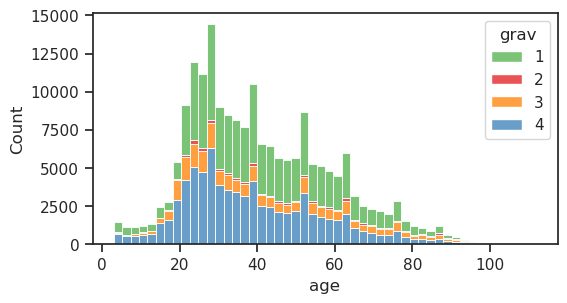

In [307]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
dataset['age'] = 2024 - dataset['an_nais']

plt.figure(figsize=(6, 3))
data_copy = dataset[dataset['age'] > 0].copy()
sns.histplot(data=data_copy, x='age', hue='grav', bins=50, palette=palette, multiple="stack")

plt.show()


* La majorité des accidents concernent les jeunes (18-35 ans), avec un pic autour de 20 ans.
* Les accidents les plus graves sont majoritairement présents chez les jeunes également

### Analyse des Accidents par Sexe des Victimes

In [308]:
dataset["sexe"].value_counts()

 1    132921
 2     60940
-1      4587
Name: sexe, dtype: int64

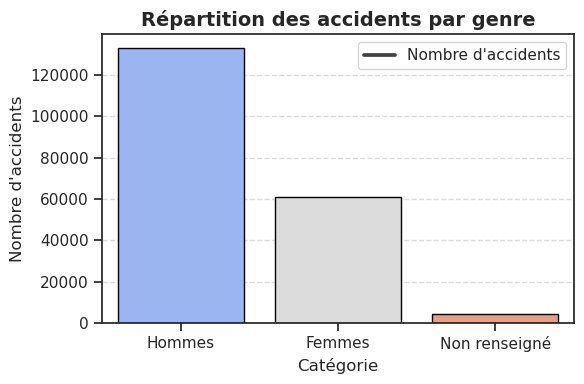

In [309]:

categories = ["Hommes", "Femmes", "Non renseigné"]
values = [132921, 60940, 4587]

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=categories, y=values, palette="coolwarm", edgecolor='black')

plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Nombre d'accidents", fontsize=12)
plt.title("Répartition des accidents par genre", fontsize=14, fontweight='bold')

plt.legend(["Nombre d'accidents"], loc="upper right")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


* Les hommes sont largement plus impliqués que les femmes dans les accidents.
* Les "Non renseigné"

#### Vérifiant maitenant la gravité de ces accidents la et voyons la différence

In [310]:
grav_homme_femme = dataset.groupby("sexe")["grav"].value_counts().unstack()
grav_homme_femme.index = ["Hommes", "Femmes", "Non renseigné"]
print(grav_homme_femme)

grav             -1        1       2        3        4
Hommes         72.0   4515.0     NaN      NaN      NaN
Femmes          NaN  61887.0  3133.0  18162.0  49739.0
Non renseigné   NaN  24557.0   888.0   6989.0  28506.0


<Figure size 1000x600 with 0 Axes>

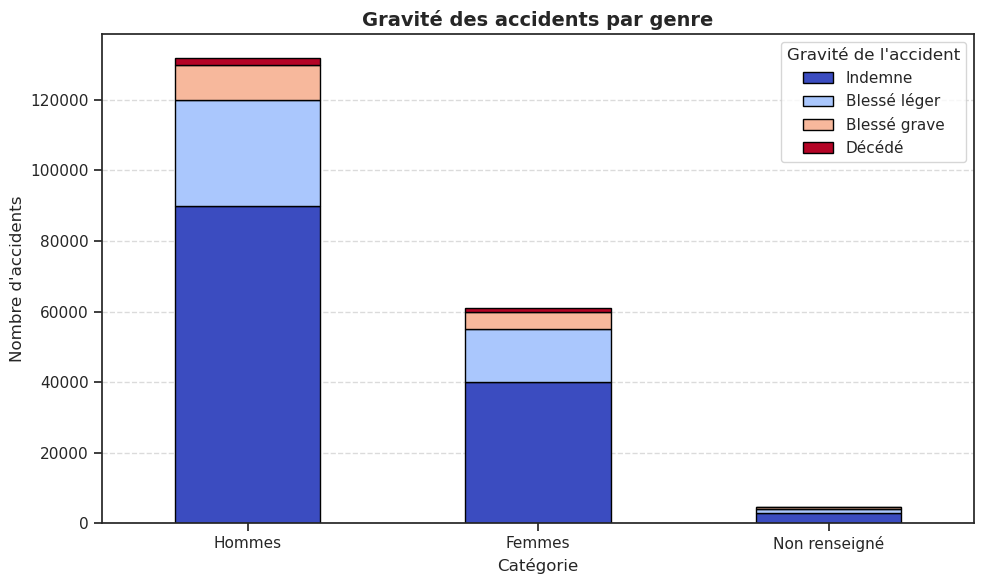

In [311]:
grav_homme_femme = {
    "Indemne": [90000, 40000, 3000],
    "Blessé léger": [30000, 15000, 1000],
    "Blessé grave": [10000, 5000, 500],
    "Décédé": [2000, 900, 87],
}

df_grav = pd.DataFrame(grav_homme_femme, index=["Hommes", "Femmes", "Non renseigné"])

plt.figure(figsize=(10, 6))
ax = df_grav.plot(kind="bar", stacked=True, colormap="coolwarm", edgecolor="black", figsize=(10, 6))
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Nombre d'accidents", fontsize=12)
plt.title("Gravité des accidents par genre", fontsize=14, fontweight='bold')
plt.legend(title="Gravité de l'accident", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Modèle de Prédiction de la Gravité des Accidents

## 1. Netoyage des données (données manquates)


In [312]:
dataset_clean = dataset.copy()
print("Valeurs manquantes par colonne :")
print(dataset_clean.isna().sum())

Valeurs manquantes par colonne :
place           0
catu            0
sexe            0
trajet          0
secu1           0
secu2           0
secu3           0
locp            0
catv            0
an_nais      4597
mois            0
occutc     196783
obs             0
obsm            0
choc            0
manv            0
lum             0
agg             0
int             0
atm             0
col             0
catr            0
circ            0
vosp            0
prof            0
plan            0
surf            0
infra           0
situ            0
lat             0
long            0
hrmn            0
jour            0
grav            0
age          4597
dtype: int64


* On constate alors qu'il y'a deux features qui contiennent pas mal de valeurs manquantes
    * an_nais      4597<br>
        • Sur 198 448 observations, 4 597 valeurs sont manquantes, ce qui représente environ 2,3 % du total.(ce taux est relativement faible, on peut donc envisager de les enlever du dataset
        
    * occutc     196783<br>
         • Avec 196 783 valeurs manquantes sur 198 448 observations, cette variable est quasiment entièrement absente, on peu donc envisager de suprimer cet feature complétement

In [313]:
print("Taille du dataset avant filtrage sur 'grav' :", dataset.shape)
dataset_valid = dataset_clean[dataset_clean['grav'].notna()]
print("Taille du dataset après filtrage sur 'grav' :", dataset_valid.shape)

Taille du dataset avant filtrage sur 'grav' : (198448, 35)
Taille du dataset après filtrage sur 'grav' : (198448, 35)


* c'est normal. Cela signifie que dans la colonne 'grav', il n'y a pas de valeurs manquantes, donc le filtre notna() ne supprime aucune ligne et le dataset conserve la même taille.

In [314]:
codes_manquants = [-1, '.']
colonnes_a_nettoyer = ['grav', 'hrmn', ]

for col in colonnes_a_nettoyer:
    dataset_clean[col] = dataset_clean[col].replace(codes_manquants, np.nan)

print("Après remplacement, valeurs manquantes par colonne :")
print(dataset_clean.isna().sum())
print("Taille du dataset avant filtrage sur 'grav' :", dataset.shape)
dataset_valid = dataset_clean[dataset_clean['grav'].notna()]
print("Taille du dataset après filtrage sur 'grav' :", dataset_valid.shape)

Après remplacement, valeurs manquantes par colonne :
place           0
catu            0
sexe            0
trajet          0
secu1           0
secu2           0
secu3           0
locp            0
catv            0
an_nais      4597
mois            0
occutc     196783
obs             0
obsm            0
choc            0
manv            0
lum             0
agg             0
int             0
atm             0
col             0
catr            0
circ            0
vosp            0
prof            0
plan            0
surf            0
infra           0
situ            0
lat             0
long            0
hrmn            0
jour            0
grav           72
age          4597
dtype: int64
Taille du dataset avant filtrage sur 'grav' : (198448, 35)
Taille du dataset après filtrage sur 'grav' : (198376, 35)


* Aprés traitement sur la colonne "grav" : les valeurs manquantes (72) représentent un très faible pourcentage du dataset (~0,036%), les supprimer ne devrait pas impacter le modèle.<br> 
* il est aussi utile de comparer les performances du modèle en laissant ces lignes

### 1.1  Aprés traitement des données manquantes

In [315]:
dataset_clean = dataset_clean.drop(columns=['occutc'])
median_an_nais = dataset_clean['an_nais'].median()
dataset_clean['an_nais'] = dataset_clean['an_nais'].fillna(median_an_nais)
dataset_clean['age'] = 2024 - dataset_clean['an_nais']

dataset_clean = dataset_clean[dataset_clean['grav'].notna()]

In [316]:
print(dataset_clean.columns)

Index(['place', 'catu', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'catv', 'an_nais', 'mois', 'obs', 'obsm', 'choc', 'manv', 'lum', 'agg',
       'int', 'atm', 'col', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf',
       'infra', 'situ', 'lat', 'long', 'hrmn', 'jour', 'grav', 'age'],
      dtype='object')


* Ce nouveau dataset "dataset_clean" est prêt pour les étapes suivantes

In [317]:
print("Taille du dataset :", dataset_clean.shape)

Taille du dataset : (198376, 34)


## 2. Netoyage des données (données abérantes)


* Avant de passer à la prochaine étape, on va d'abord faire un traitement sur la variable catégorielle "hrmn"

In [318]:
print(dataset_clean['hrmn'].head(10))

0    16:35
1    17:20
2    16:50
3    18:00
4    17:35
5    12:10
6    15:45
7    18:15
8    13:30
9    03:35
Name: hrmn, dtype: object


* Ce calcule nous permet d'avoir une vision sur comment est la structure de l'heure minute

In [319]:
dataset_clean['hrmn'] = dataset_clean['hrmn'].str.replace(':', '', regex=False)
dataset_clean['hrmn'] = pd.to_numeric(dataset_clean['hrmn'], errors='coerce')
print(dataset_clean['hrmn'].head(10))
print("Nombre de NaN dans 'hrmn' après conversion :", dataset_clean['hrmn'].isna().sum())



print("Valeurs manquantes restantes :")
print(dataset_clean.isna().sum())

0    1635
1    1720
2    1650
3    1800
4    1735
5    1210
6    1545
7    1815
8    1330
9     335
Name: hrmn, dtype: int64
Nombre de NaN dans 'hrmn' après conversion : 0
Valeurs manquantes restantes :
place      0
catu       0
sexe       0
trajet     0
secu1      0
secu2      0
secu3      0
locp       0
catv       0
an_nais    0
mois       0
obs        0
obsm       0
choc       0
manv       0
lum        0
agg        0
int        0
atm        0
col        0
catr       0
circ       0
vosp       0
prof       0
plan       0
surf       0
infra      0
situ       0
lat        0
long       0
hrmn       0
jour       0
grav       0
age        0
dtype: int64


In [320]:
dataset_clean.shape


(198376, 34)

### 2.1 Utiliser des bornes issues de la connaissance du domaine

La méthode la plus simple (et souvent la plus pertinente) consiste à définir des intervalles de valeurs plausibles en fonction du contexte :

- **lat (latitude en France)** : entre **41** et **52**
- **long (longitude en France)** : entre **-5** et **10**
- **hrmn (heure-minute)** : entre **0** et **2359**
- **an_nais (année de naissance)** : par exemple entre **1900** et **2025**

### Justification

- **Latitude & Longitude**  
  Ces bornes sont établies à partir de la localisation géographique de la France métropolitaine, qui se situe approximativement entre 41° et 52° de latitude, et entre -5° et 10° de longitude.

- **Heure-minute (hrmn)**  
  En format « HHMM », la valeur minimale est 0 (minuit) et la valeur maximale est 2359 (une minute avant minuit).

- **Année de naissance (an_nais)**  
  Ces bornes permettent d'exclure les valeurs aberrantes, car il est peu probable que des individus nés avant 1900 ou après 2025 soient impliqués dans les accidents analysés.


In [321]:

print("Taille du dataset avant filtrage :", dataset_clean.shape)
dataset_clean = dataset_clean[
    (dataset_clean['lat'] >= 41) & (dataset_clean['lat'] <= 52) &
    (dataset_clean['long'] >= -5) & (dataset_clean['long'] <= 10) &
    (dataset_clean['hrmn'] >= 0) & (dataset_clean['hrmn'] <= 2359) &
    (
        dataset_clean['an_nais'].isna() | 
        ((dataset_clean['an_nais'] >= 1900) & (dataset_clean['an_nais'] <= 2025))
    )
]

print("Taille du dataset après filtrage :", dataset_clean.shape)

Taille du dataset avant filtrage : (198376, 34)
Taille du dataset après filtrage : (187932, 34)


* Nous avons éliminé les lignes du dataset qui contenaient des valeurs aberrantes pour ces variables. Cela se reflète dans la réduction du nombre d'observations, passant de 198376 à 187932.

### Analyse de la matrice de corrélation

Après examen attentif de la matrice de corrélation, voici les principales observations :

#### **Variables fortement corrélées :**
Ces variables présentent des coefficients de corrélation significatifs :

- **`place` avec `locp` :** **0.66**
  - La place occupée par l'usager est trés liée à l'implication d'un piéton et sa position sur la voix publique.

- **`place` avec `catu` :** **0.85**
  - La catégorie d'usager est trés liée à la place occupée, le conducteur est toujours en place 1.

- **`obs` avec `obsm` :** **0.56**
  - Association logique entre obstacles fixes et obstacles mobiles percutés lors des accidents.

#### **Variables faiblement corrélées (corrélation modérée à faible) :**
Ces variables montrent une relation modérée à faible

- `col` avec  `catr` : **0.29**
- `circ` aevc `col` : **0.29**
- `catr` avec  `col` : **0.29**


#### **Absence de forte corrélation avec la cible (`grav`) :**
- La variable cible (`grav`) présente de faibles corrélations avec les autres variables numériques du dataset

## Conséquences sur le dataset_clean
* Supprimer place
* Supprimer obsm
#### Ces modifications n'auront aucune influences sur le dataset, et on perdra pas d'informations car il s'agit d'une redendance

In [322]:
print("Taille du dataset avant suppression :", dataset_clean.shape)
colonnes_a_supprimer = [col for col in dataset_clean.columns if 'place' in col or 'obsm' in col]
dataset_clean = dataset_clean.drop(columns=colonnes_a_supprimer)

print("Colonnes supprimées :", colonnes_a_supprimer)
print("Taille du dataset après suppression :", dataset_clean.shape)

Taille du dataset avant suppression : (187932, 34)
Colonnes supprimées : ['place', 'obsm']
Taille du dataset après suppression : (187932, 32)


## 3. Traitement des caractéristiques

In [323]:
dataset_clean['heure'] = dataset_clean['hrmn'] // 100


dataset_clean['age'] = 2025 - dataset_clean['an_nais']
ages = [0, 18, 25, 35, 45, 60, 75, 100]
tranches = ['0-17', '18-24', '25-34', '36-49', '50-64', '65-80', '81+']

dataset_clean['tranche_age'] = pd.cut(dataset_clean['age'], bins=ages, labels=tranches, right=False)
print(dataset_clean[['age', 'tranche_age']].value_counts())
dataset_clean = dataset_clean.dropna()

age   tranche_age
39.0  36-49          7672
25.0  25-34          5836
24.0  18-24          5506
26.0  25-34          5460
27.0  25-34          5087
                     ... 
95.0  81+             143
96.0  81+              69
97.0  81+              60
98.0  81+              44
99.0  81+              24
Length: 96, dtype: int64



* Ces deux lignes de code créent de nouvelles caractéristiques (features) utiles pour le modèle :

- `dataset_clean['heure'] = dataset_clean['hrmn'] // 100`  
  **Extrait l'heure** à partir de la colonne `hrmn`. Par exemple, `1635` (16h35) devient simplement `16`.

- `dataset_clean['age'] = 2025 - dataset_clean['an_nais']`  
  Calcule l'**âge de l'usager** à partir de son année de naissance.<br>
  
Ces features sont maintenant faciles à interpréter.<br>
Apportent une meilleure granularité à tes données (l’heure précise pourrait être trop détaillée, et l'année de naissance moins directement exploitable que l’âge).

In [329]:
dataset_clean

,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,mois,obs,choc,manv,lum,agg,int,atm,col,catr,circ,vosp,prof,plan,surf,infra,situ,lat,long,hrmn,jour,grav,age,heure,tranche_age
0,1,1,5,2,-1,-1,0,34,1970.0,9,0,1,1,1,2,2,1,3,3,2,0,1,1,1,0,1,50.391191,1.605050,1635,25,3.0,55.0,16,50-64
1,2,2,5,1,8,-1,0,10,2001.0,6,0,2,1,1,2,1,1,3,4,3,1,1,1,1,0,1,43.425772,3.731132,1720,1,1.0,24.0,17,18-24
2,1,1,0,2,-1,-1,0,7,1986.0,6,0,4,13,1,1,1,1,2,3,2,0,1,1,1,0,1,43.507931,3.720036,1650,11,4.0,39.0,16,36-49
3,1,2,1,1,4,-1,-1,7,1989.0,1,0,4,0,3,1,1,2,4,1,3,0,1,1,2,0,1,48.911180,2.005489,1800,29,4.0,36.0,18,36-49
4,1,1,9,8,0,-1,-1,7,2002.0,12,0,9,26,2,2,1,1,7,1,2,0,1,2,2,0,1,47.430710,-0.506032,1735,27,4.0,23.0,17,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198443,1,2,5,8,8,-1,-1,50,1980.0,7,0,8,1,1,2,1,1,3,4,3,1,2,1,1,0,1,43.102753,5.811474,1255,22,1.0,45.0,12,50-64
198444,2,1,0,1,0,-1,-1,10,1988.0,8,0,7,1,1,2,2,1,3,3,1,0,1,1,1,0,1,48.914542,2.229174,1020,18,1.0,37.0,10,36-49
198445,1,1,0,1,0,-1,-1,7,1997.0,7,0,4,1,5,1,1,1,2,1,3,0,2,1,1,0,1,48.902870,2.358630,2240,9,4.0,28.0,22,25-34
198446,1,2,5,1,0,-1,0,7,1979.0,6,0,1,13,1,1,1,1,1,3,2,0,1,1,1,0,1,44.510370,6.079600,1625,18,3.0,46.0,16,50-64


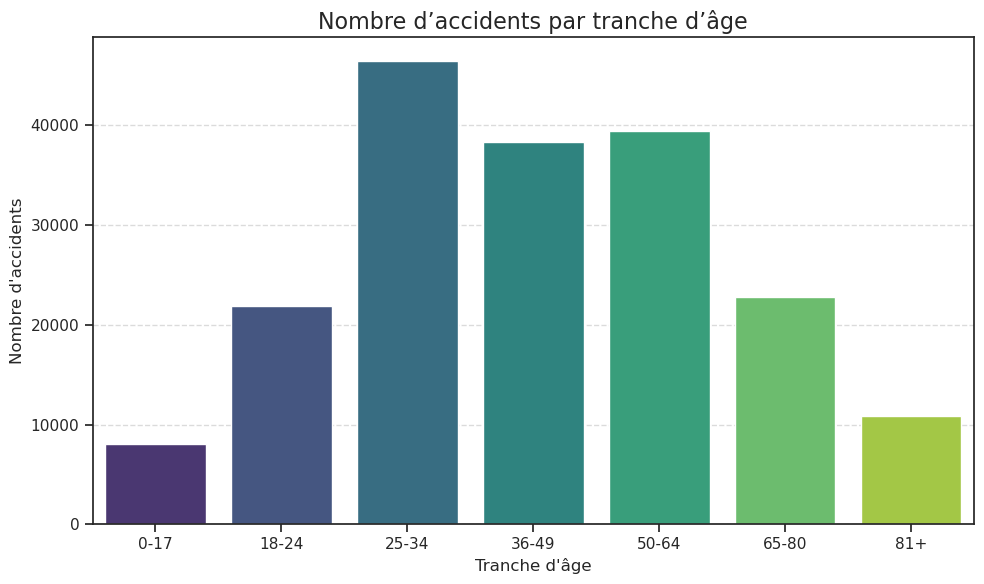

In [324]:

age_counts = dataset_clean['tranche_age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))

sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')

plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre d'accidents")
plt.title("Nombre d’accidents par tranche d’âge", fontsize=16)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------


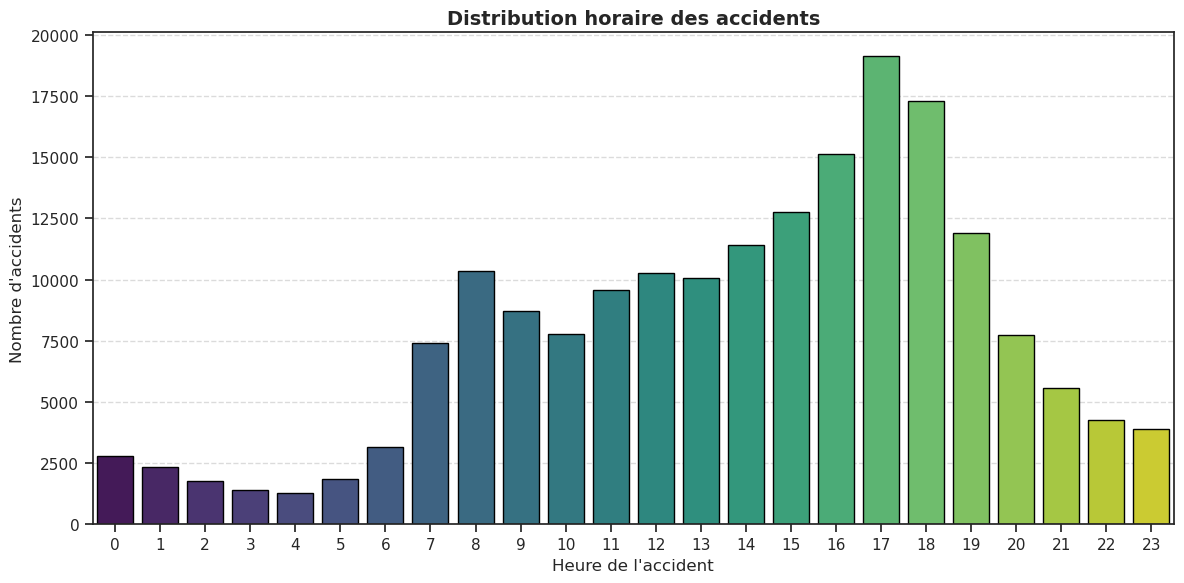

In [325]:
heure_counts = dataset_clean['heure'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=heure_counts.index, y=heure_counts.values, palette='viridis', edgecolor='black')

plt.xlabel("Heure de l'accident", fontsize=12)
plt.ylabel("Nombre d'accidents", fontsize=12)
plt.title("Distribution horaire des accidents", fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [326]:
dataset_clean.shape


(187878, 34)

### Corr

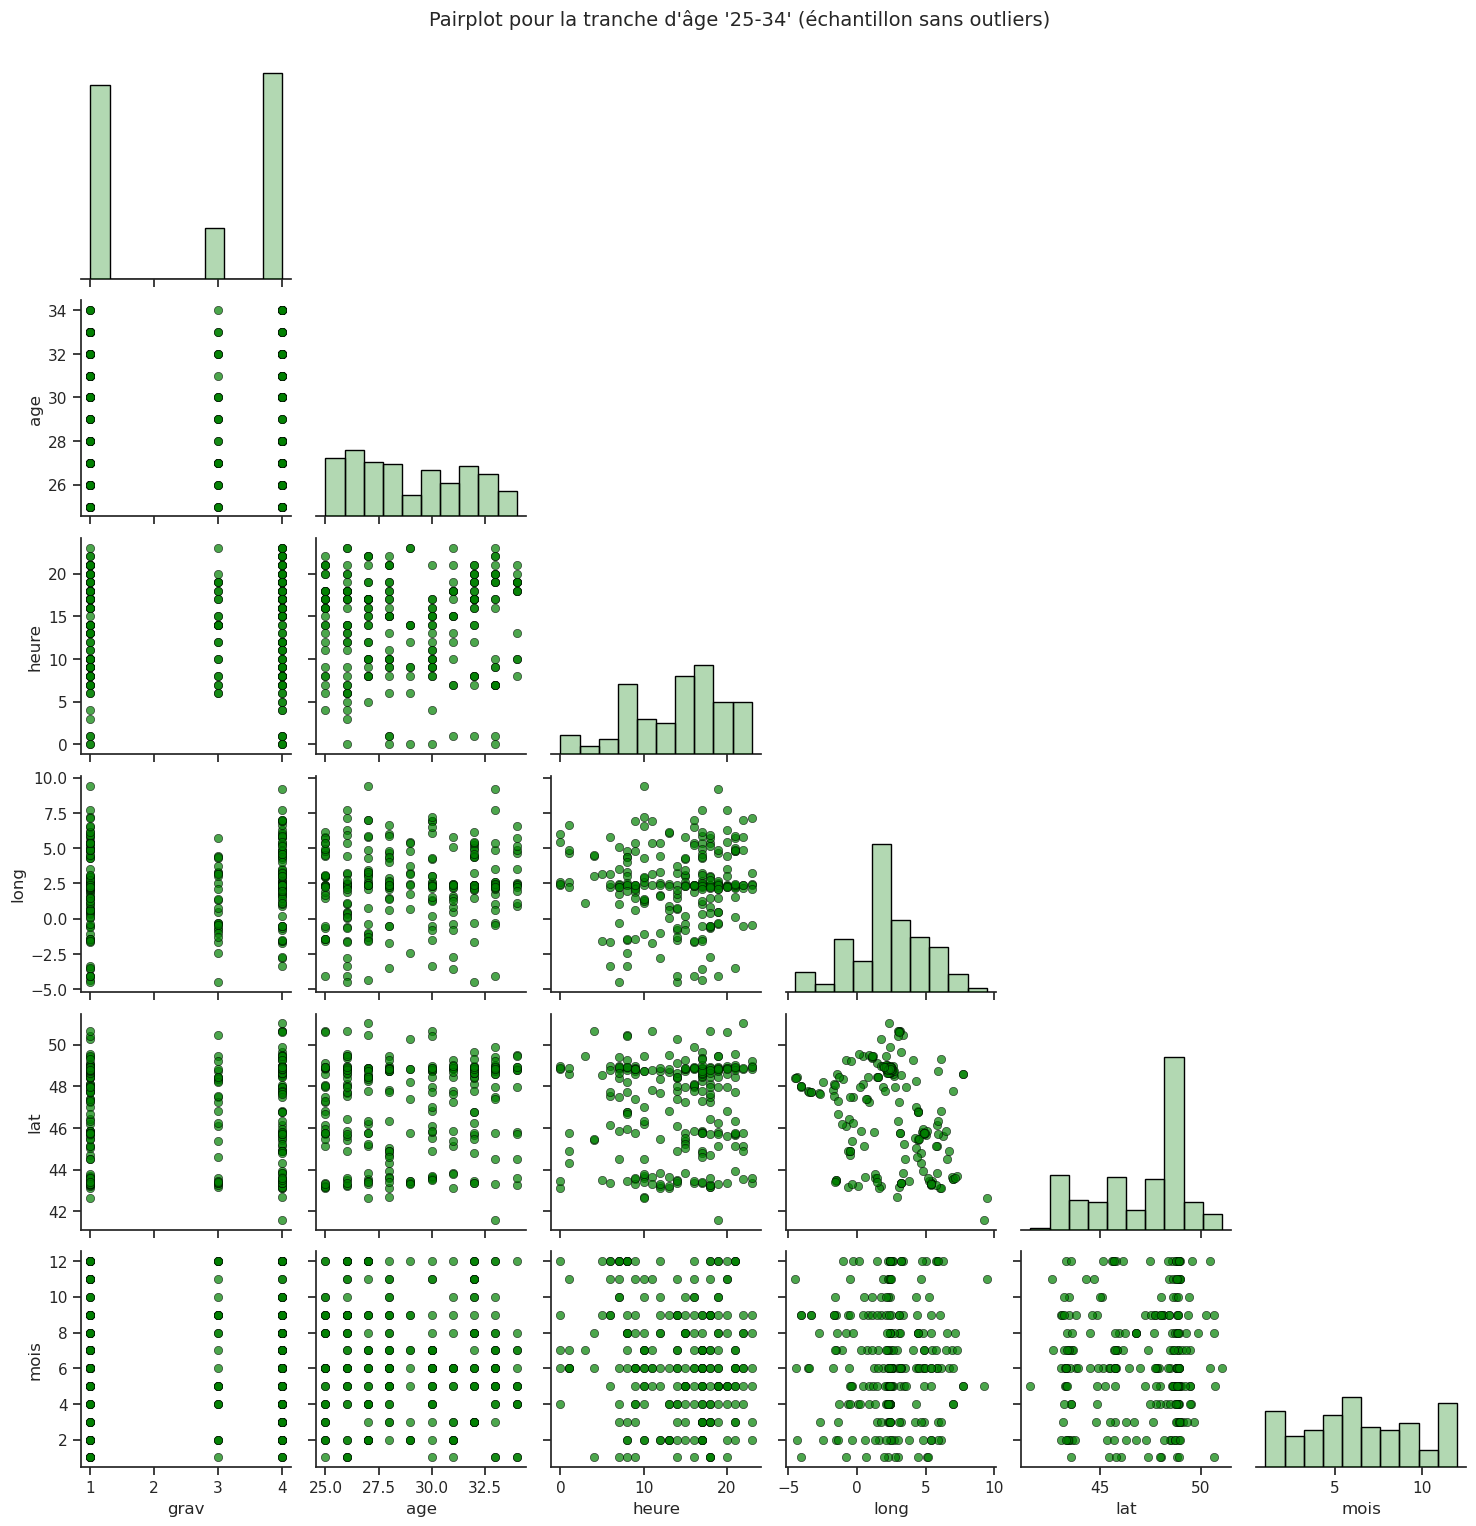

In [335]:
# Choix de la tranche d'âge à analyser clairement définie ici
tranche_specifique = "25-34"

# Sélection uniquement de cette tranche d'âge
df_subset_tranche = dataset_clean[dataset_clean['tranche_age'] == tranche_specifique].copy()

cols_of_interest = [
    "grav",
    "age",
    "heure",
    "long",
    "lat",
    "mois"
]

df_subset = df_subset_tranche[cols_of_interest].copy()

df_sample = df_subset.sample(frac=0.005, random_state=42)

z_scores = np.abs(stats.zscore(df_sample, nan_policy='omit'))
df_sample_no_outliers = df_sample[(z_scores < 3).all(axis=1)]

sns.set(style="ticks")

g = sns.pairplot(
    df_sample_no_outliers,
    corner=True,
    diag_kind="hist",
    height=2.5,
    diag_kws={
        "alpha": 0.3,
        "bins": 10,
        "edgecolor": "black",
        "color": "green"
    },
    plot_kws={
        "alpha": 0.7,
        "edgecolor": "black",
        "color": "green"
    }
)

plt.suptitle(f"Pairplot pour la tranche d'âge '{tranche_specifique}' (échantillon sans outliers)",
             y=1.02, fontsize=14)

plt.show()


### Analyse
L'analyse détaillée de ces graphiques sera présentée lors de la soutenance

---
Nous avons sélectionné uniquement les colonnes les plus pertinentes.

---
Le pairplot a été réalisé sur un échantillon de données pour améliorer la lisibilité.

- **Diagonale** : Distribution individuelle de chaque variable (fréquences, pics).
- **Hors diagonale** : Relations ou corrélations entre variables.


**Remarque :**  
Après avoir effectué toutes ces étapes de nettoyage, et d'encodage les données sont désormais bien structurées et cohérentes. Les graphiques obtenus sont nettement plus lisibles

In [336]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Choisir les features
features = ['age', 'heure', 'long', 'lat', 'mois']

X = dataset_clean[features]
y = dataset_clean['grav']

# Suppression éventuelle des NaN restants
X = X.dropna()
y = y.loc[X.index]

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardisation (important)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [337]:
from sklearn.linear_model import LogisticRegression

# Entraînement du modèle de régression logistique multinomiale
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Prédiction sur les données test
y_pred = logreg.predict(X_test)


In [338]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy du modèle (Régression Logistique) :", accuracy)

# Rapport détaillé clair
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

# Matrice de confusion claire
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))


Accuracy du modèle (Régression Logistique) : 0.48868958909942517

Rapport de classification :
               precision    recall  f1-score   support

         1.0       0.50      0.80      0.61     17386
         2.0       0.00      0.00      0.00       733
         3.0       0.00      0.00      0.00      4678
         4.0       0.47      0.30      0.36     14779

    accuracy                           0.49     37576
   macro avg       0.24      0.28      0.24     37576
weighted avg       0.41      0.49      0.43     37576


Matrice de confusion :
 [[13978     0     0  3408]
 [  581     0     0   152]
 [ 3269     0     0  1409]
 [10394     0     0  4385]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
